# Home Loan Denial Analysis


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Load the data
file_path = "../data/raw/loan_data_train.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
def clean_data(df):
    # Handle missing values
    df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
    df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
    df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
    df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
    df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
    df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
    df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])

    # Convert categorical variables to numeric codes
    df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
    df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
    df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
    df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
    df['Property_Area'] = df['Property_Area'].map({'Urban': 2, 'Semiurban': 1, 'Rural': 0})
    df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

    # Convert 'Dependents' to numeric, handle '3+' case
    df['Dependents'] = df['Dependents'].replace('3+', 3).astype(int)

    return df

# Clean the data
clean_df = clean_data(df)
clean_df.head()



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [4]:
def process_data(df):
    # Feature Engineering: Create Debt-to-Income Ratio
    df['Debt_to_Income_Ratio'] = df['LoanAmount'] / (df['ApplicantIncome'] + df['CoapplicantIncome'] + 1)
    
    # Scaling numerical features
    scaler = StandardScaler()
    df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Debt_to_Income_Ratio']] = scaler.fit_transform(
        df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Debt_to_Income_Ratio']])
    
    return df

# Process the data
processed_df = process_data(clean_df)
processed_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Debt_to_Income_Ratio
0,LP001002,1,0,0,1,0,0.072991,-0.554487,0.000000,0.273231,1.0,2,1,0.113705
1,LP001003,1,1,1,1,0,-0.134412,-0.038732,-0.219273,0.273231,1.0,0,0,-0.335743
2,LP001005,1,1,0,1,1,-0.393747,-0.554487,-0.957641,0.273231,1.0,2,1,-0.225913
3,LP001006,1,1,0,0,0,-0.462062,0.251980,-0.314547,0.273231,1.0,2,1,0.030223
4,LP001008,1,0,0,1,0,0.097728,-0.554487,-0.064454,0.273231,1.0,2,1,-0.057683


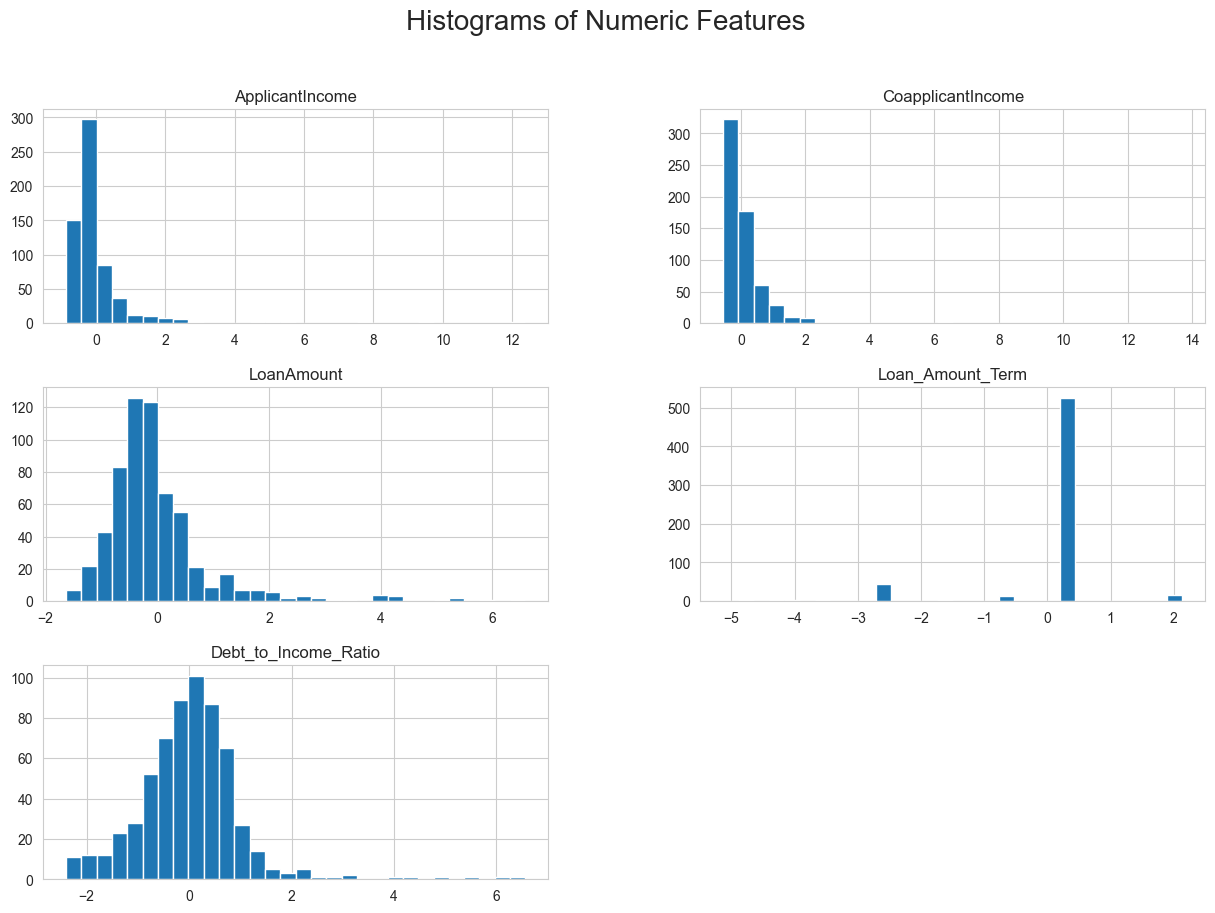

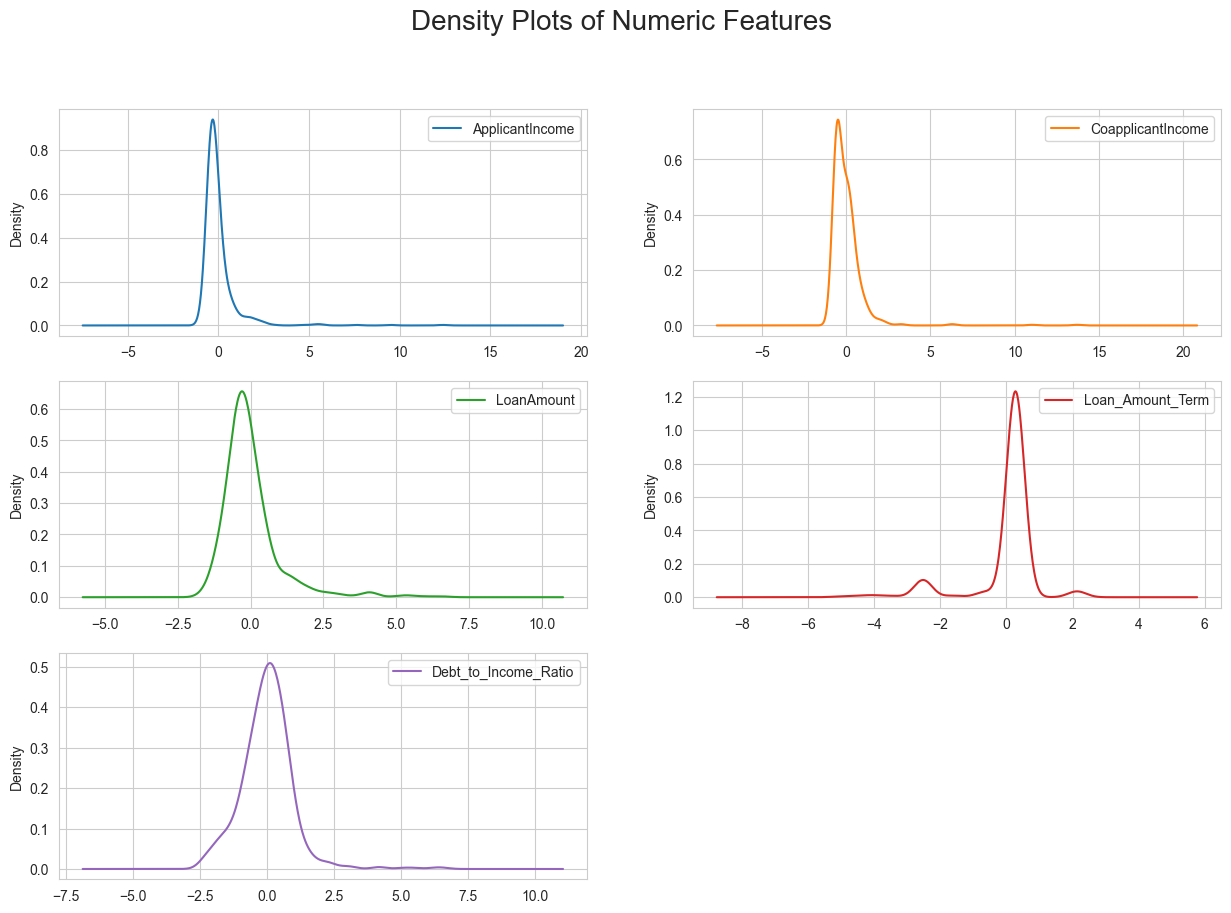

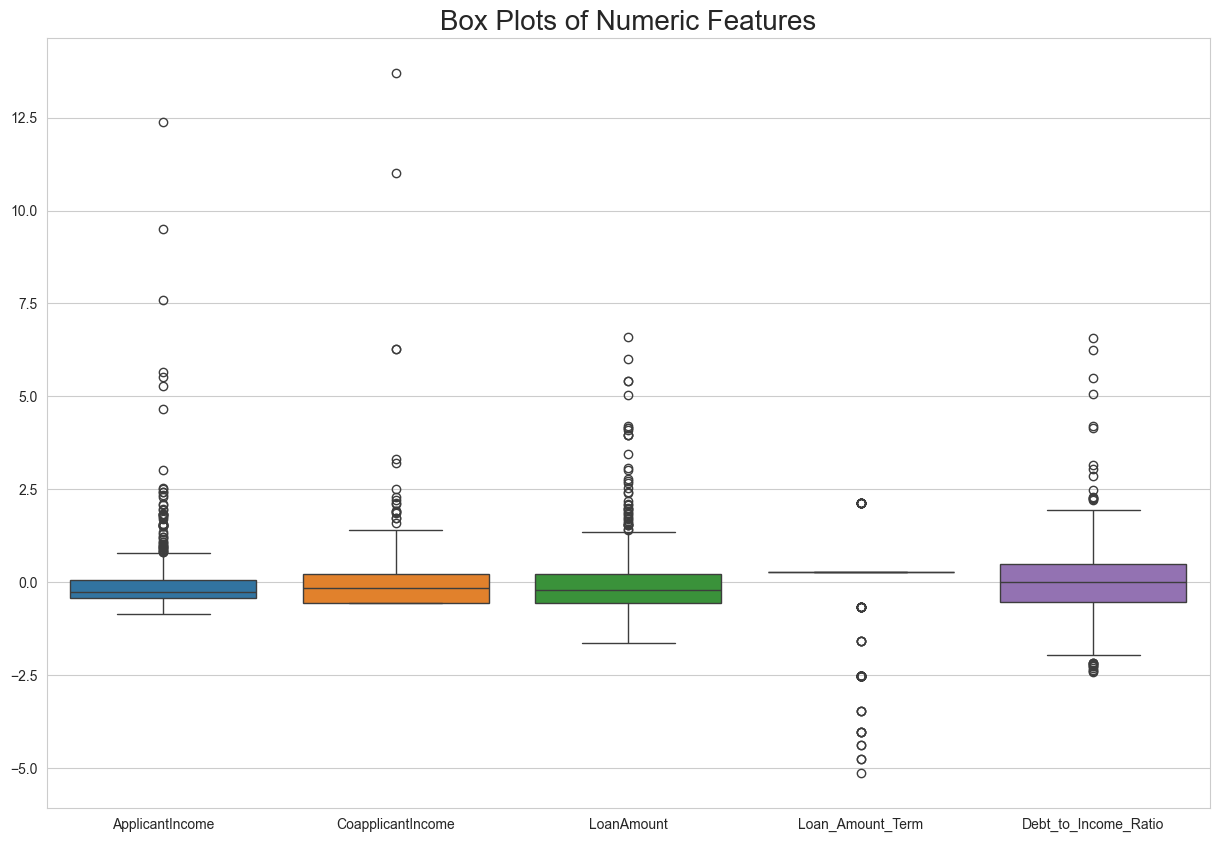

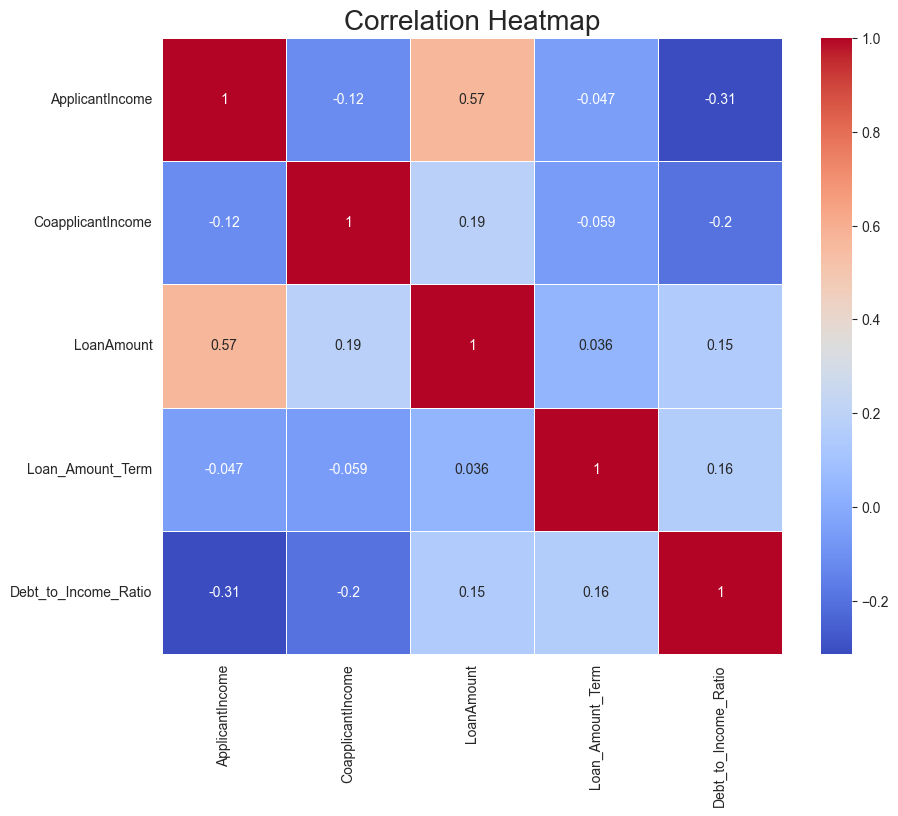

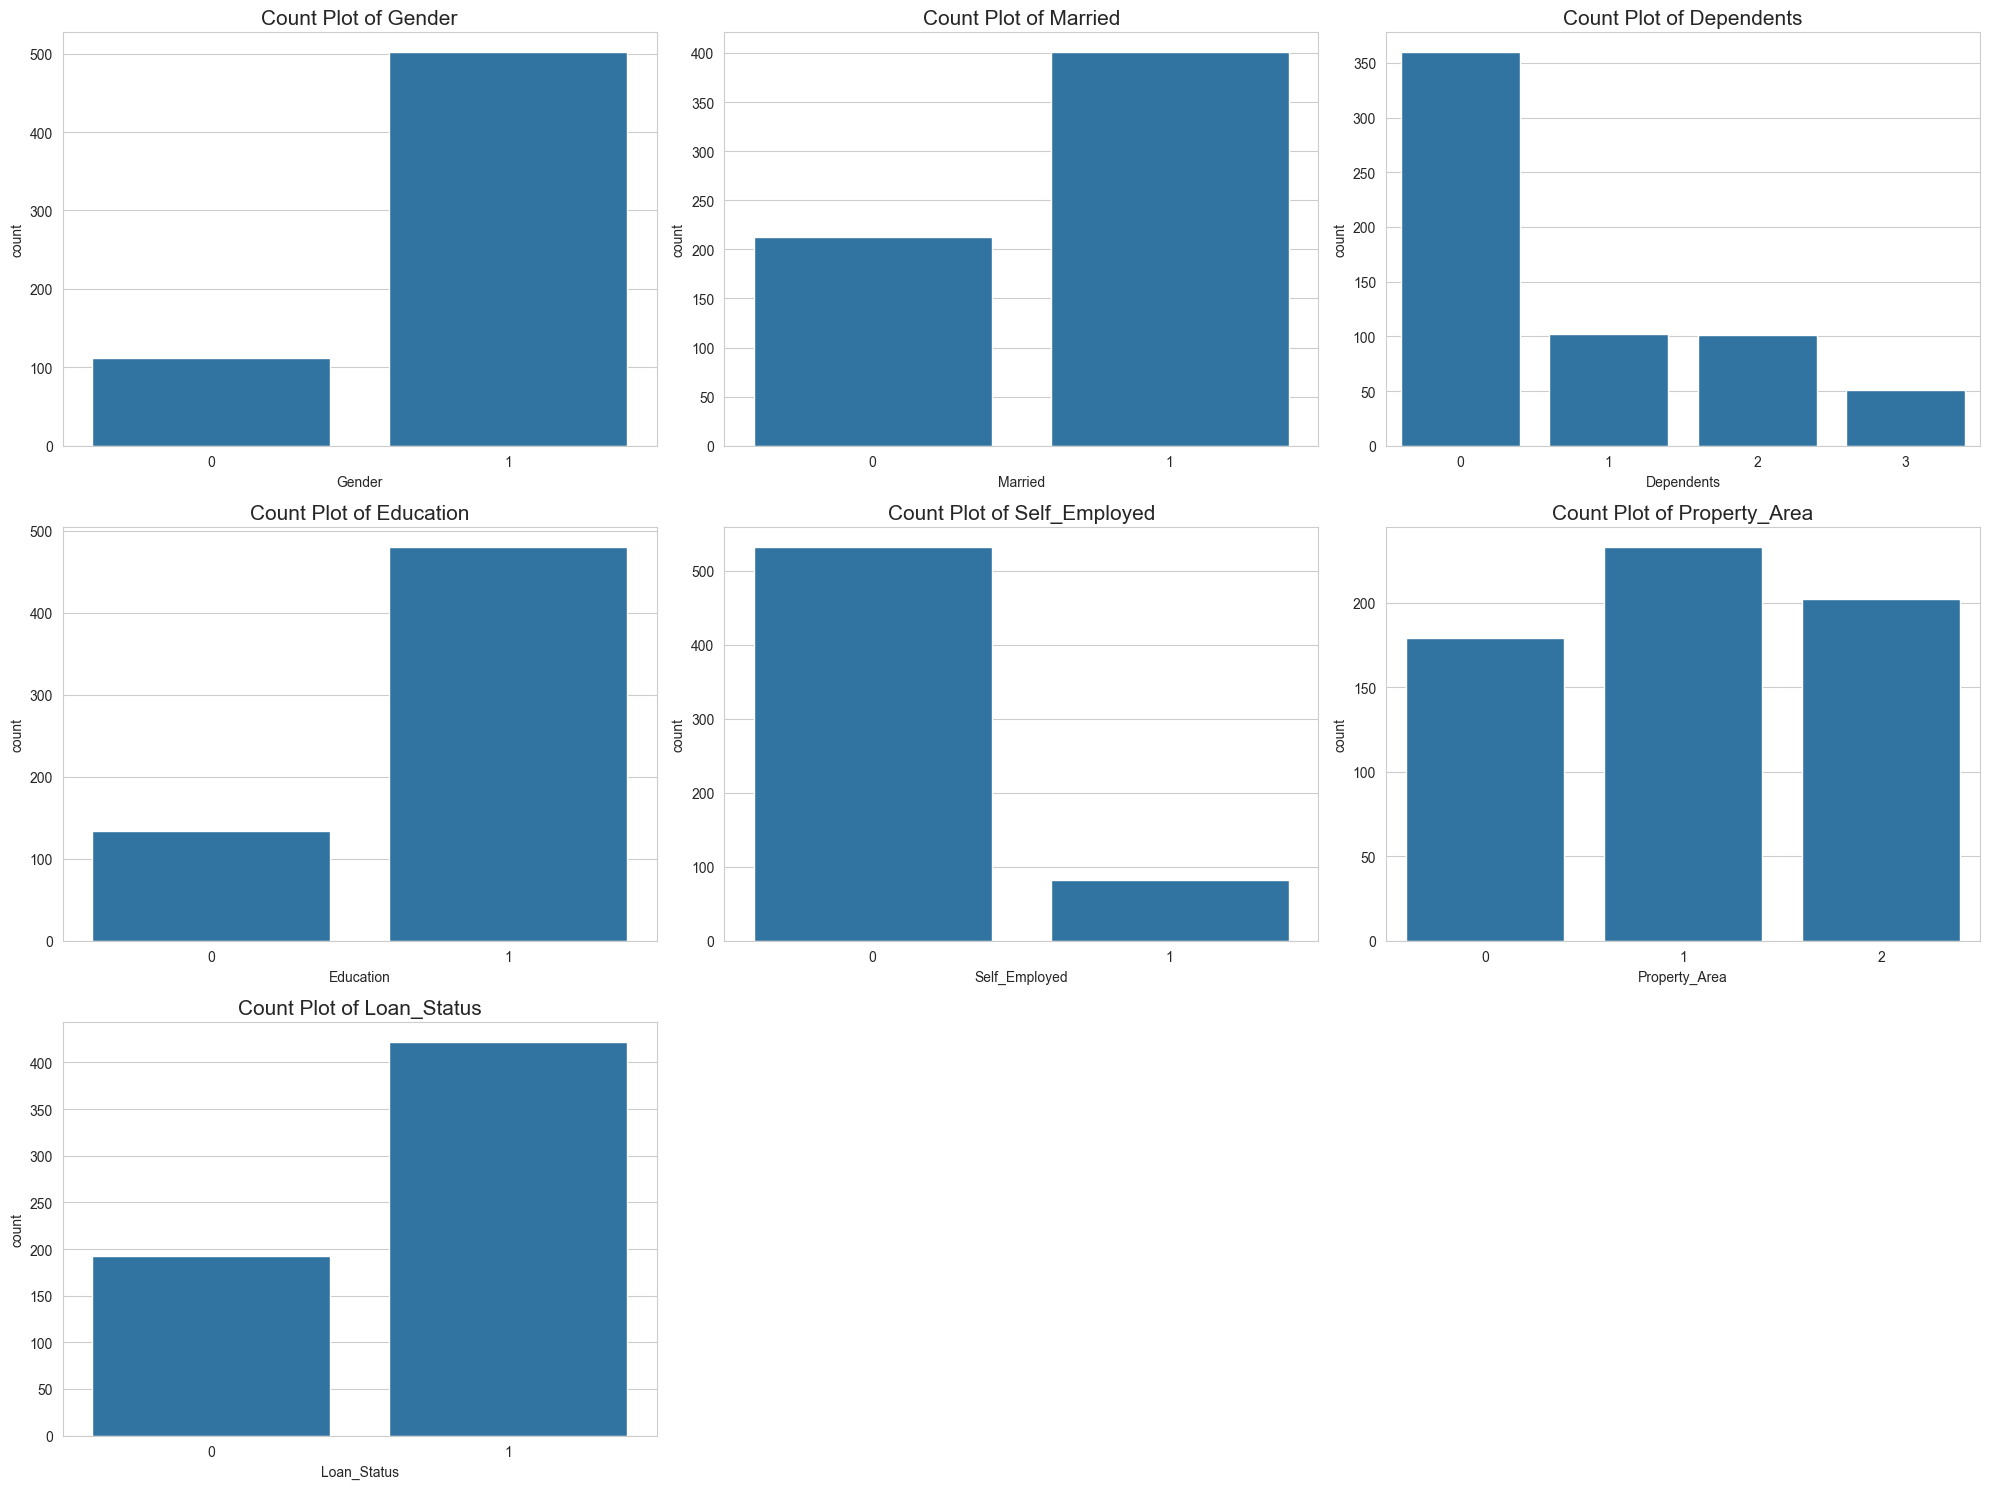

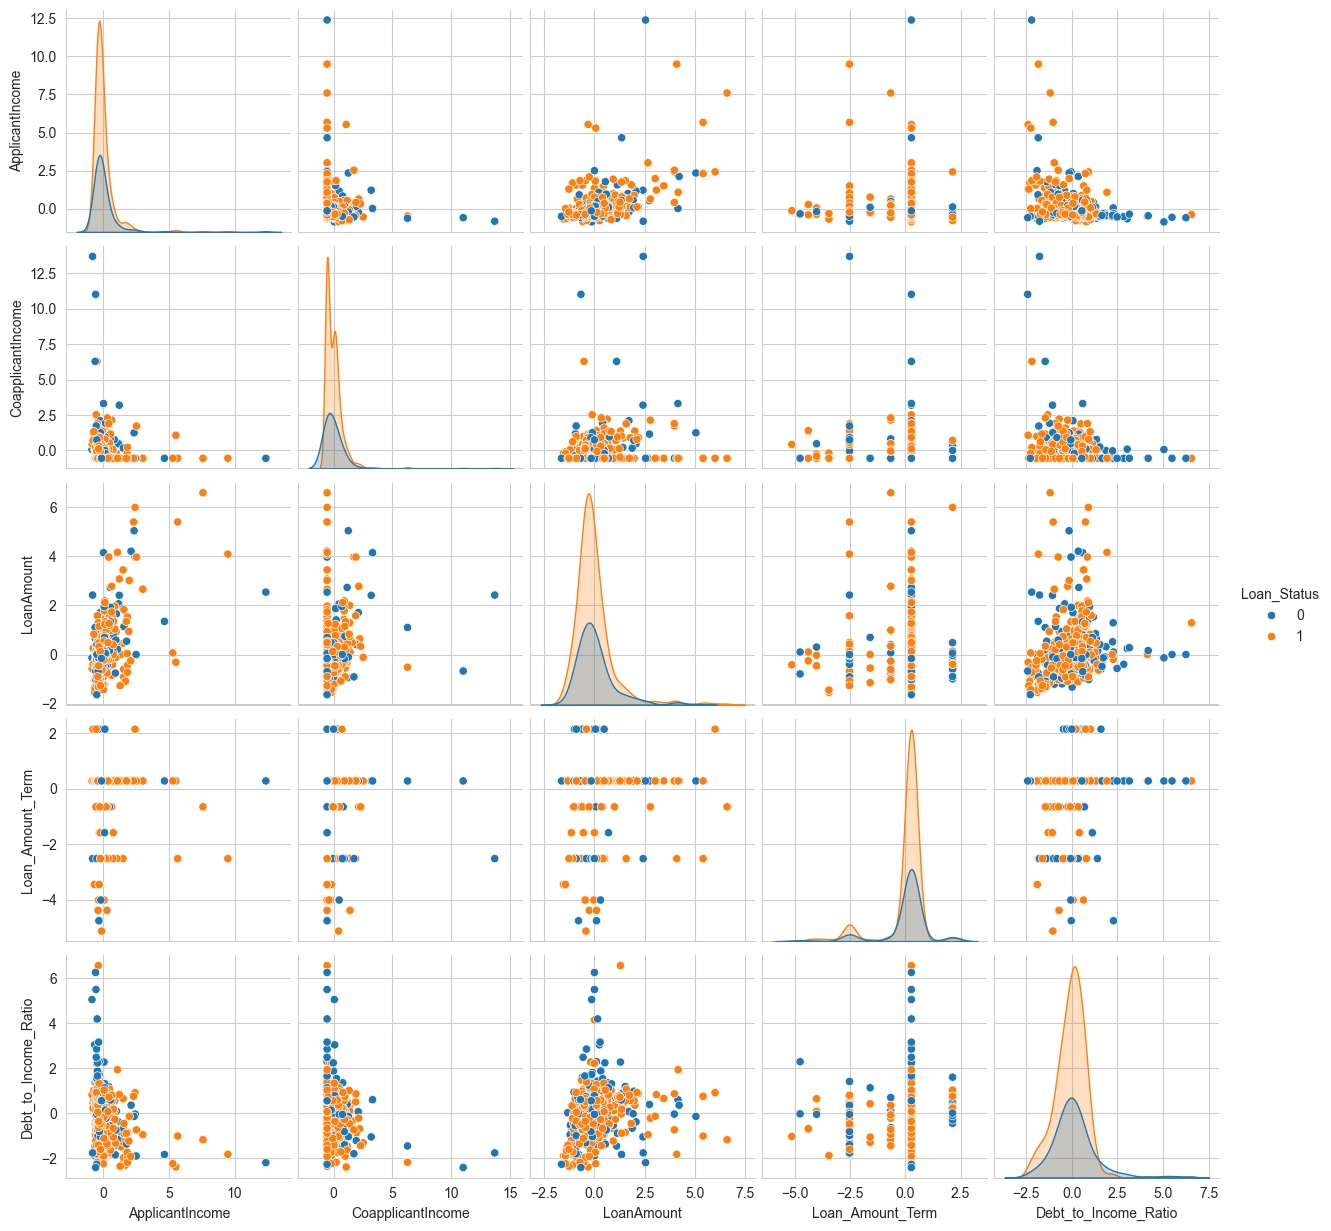

In [5]:
def exploratory_data_analysis(df):
    # Histograms and Density Plots for numeric features
    num_features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Debt_to_Income_Ratio']
    df[num_features].hist(bins=30, figsize=(15, 10))
    plt.suptitle('Histograms of Numeric Features', size=20)
    plt.show()

    df[num_features].plot(kind='density', subplots=True, layout=(3, 2), sharex=False, figsize=(15, 10))
    plt.suptitle('Density Plots of Numeric Features', size=20)
    plt.show()

    # Box Plots for numeric features
    plt.figure(figsize=(15, 10))
    sns.boxplot(data=df[num_features])
    plt.title('Box Plots of Numeric Features', size=20)
    plt.show()

    # Correlation Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[num_features].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap', size=20)
    plt.show()

    # Count Plots for categorical features
    cat_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
    plt.figure(figsize=(20, 15))
    for i, feature in enumerate(cat_features, 1):
        plt.subplot(3, 3, i)
        sns.countplot(data=df, x=feature)
        plt.title(f'Count Plot of {feature}', size=15)
    plt.tight_layout()
    plt.show()

    # Pairplot for relationships between features
    sns.pairplot(df[num_features + ['Loan_Status']], hue='Loan_Status')
    plt.show()

# Perform EDA
exploratory_data_analysis(processed_df)


In [6]:
# Save the cleaned and processed data
processed_df.to_csv("../data/processed/cleaned_loan_data.csv", index=False)
print("Data cleaned and processed. Saved to data/processed/cleaned_loan_data.csv")


Data cleaned and processed. Saved to data/processed/cleaned_loan_data.csv


In [7]:

def train_model(df):
    df = df.drop("Loan_ID", axis=1)
    X = df.drop("Loan_Status", axis=1)
    y = df["Loan_Status"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))

    return model

def predict(model, input_df):
    predictions = model.predict(input_df)
    return predictions

In [8]:
data_path = "../data/processed/cleaned_loan_data.csv"
df = pd.read_csv(data_path)
model = train_model(df)

              precision    recall  f1-score   support

           0       0.82      0.49      0.62        65
           1       0.77      0.94      0.85       120

    accuracy                           0.78       185
   macro avg       0.80      0.72      0.73       185
weighted avg       0.79      0.78      0.77       185



## Model Performance Metrics
Precision, Recall, and F1-Score

Precision: The ratio of true positive predictions to the total predicted positives.

Precision for class 0 (denied): 0.82

Precision for class 1 (approved): 0.77

Recall: The ratio of true positive predictions to the total actual positives.

Recall for class 0 (denied): 0.49

Recall for class 1 (approved): 0.94

F1-Score: The harmonic mean of precision and recall.

F1-Score for class 0 (denied): 0.62

F1-Score for class 1 (approved): 0.85

Support

Support: The number of actual occurrences of each class in the dataset.

Class 0 (denied): 65

Class 1 (approved): 120

Overall Accuracy

Accuracy: The ratio of correctly predicted instances to the total instances.

Overall Accuracy: 0.78 (or 78%)

Averages

Macro Average: The average of precision, recall, and F1-score for all classes. It treats all classes equally.

Macro Precision: 0.80

Macro Recall: 0.72

Macro F1-Score: 0.73

Weighted Average: The average of precision, recall, and F1-score for all classes, weighted by the number of true instances for each class.

Weighted Precision: 0.79

Weighted Recall: 0.78

Weighted F1-Score: 0.77

Interpretation

Class 0 (Denied):

Precision is relatively high (0.82), indicating that when the model predicts a loan denial, it is correct 82% of the time.

Recall is low (0.49), meaning the model only correctly identifies 49% of actual denials.

F1-Score is moderate (0.62), balancing the trade-off between precision and recall.

Class 1 (Approved):

Precision is good (0.77), showing that when the model predicts a loan approval, it is correct 77% of the time.

Recall is very high (0.94), indicating the model correctly identifies 94% of actual approvals.

F1-Score is high (0.85), indicating strong overall performance for predicting approvals.

Overall Model Performance:


The macro average suggests that there is a disparity in the model's performance across classes, particularly with class 0.

The weighted average shows the model performs reasonably well when considering the class distribution.

Recommendations for Improvement

Balancing the Dataset: Since there is a disparity in the number of instances for each class, consider techniques such as oversampling the minority class (denied) or undersampling the majority class (approved) to balance the dataset.

Feature Engineering: Improve feature selection or engineering to provide the model with more relevant information.

Model Tuning: Experiment with different algorithms or hyperparameter tuning to improve model performance, particularly for class 0.

Threshold Adjustment: Adjust the decision threshold to find a better balance between precision and recall for both classes.